<a href="https://colab.research.google.com/github/emadof85/Population-Clustering/blob/main/population_multidimensional_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = 'sample_data/dataset-1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(   age workclass  fnlwgt     education  education.num marital.status  \
 0   90         ?   77053       HS-grad              9        Widowed   
 1   82   Private  132870       HS-grad              9        Widowed   
 2   66         ?  186061  Some-college             10        Widowed   
 3   54   Private  140359       7th-8th              4       Divorced   
 4   41   Private  264663  Some-college             10      Separated   
 
           occupation   relationship   race     sex  capital.gain  \
 0                  ?  Not-in-family  White  Female             0   
 1    Exec-managerial  Not-in-family  White  Female             0   
 2                  ?      Unmarried  Black  Female             0   
 3  Machine-op-inspct      Unmarried  White  Female             0   
 4     Prof-specialty      Own-child  White  Female             0   
 
    capital.loss  hours.per.week native.country income  
 0          4356              40  United-States  <=50K  
 1          4356              

In [2]:
# Replace '?' with NaN for better handling of missing values
data.replace('?', pd.NA, inplace=True)

# Check for missing values in each column
missing_values = data.isnull().sum()

missing_values


,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [3]:
# Fill missing values with the most frequent value in each column
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native.country'].fillna(data['native.country'].mode()[0], inplace=True)

# Verify if there are any remaining missing values
data.isnull().sum()


<ipython-input-3-b7c9bc8fcce6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
<ipython-input-3-b7c9bc8fcce6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Display a sample of the processed data
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [5]:
data.to_csv('preprocessed_data_1.csv', index=False)


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering (excluding target column 'income')
features = data.drop(columns=["income"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply PCA to reduce dimensionality and examine explained variance
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

explained_variance


array([0.14783223, 0.10161135, 0.08056461, 0.07870396, 0.07427552,
       0.07329118, 0.07027089, 0.06772609, 0.06487451, 0.06119792,
       0.0608425 , 0.0486531 , 0.04276666, 0.02738948])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

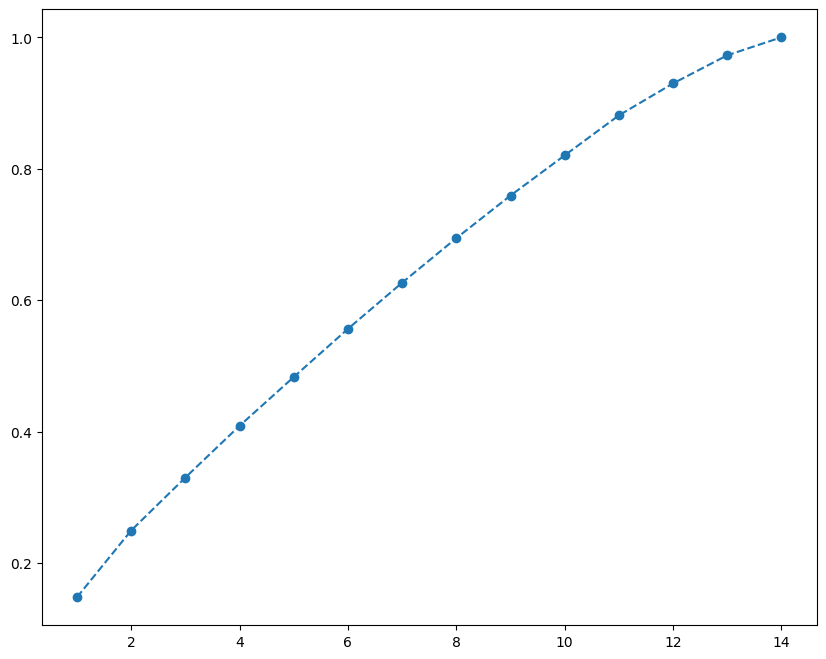

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', label='individual explained variance')
plt

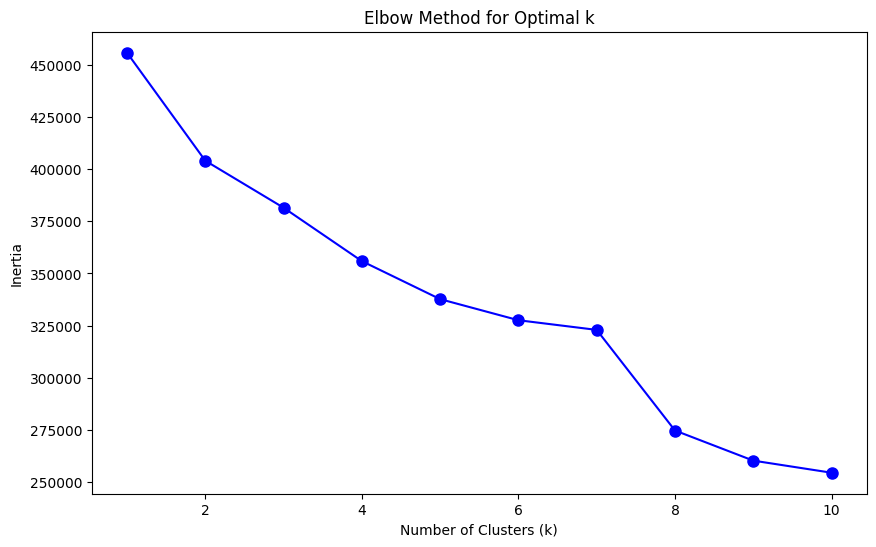

The optimal number of clusters (k) is: 6


In [8]:
import numpy as np
from sklearn.cluster import KMeans

#Elbow Method
inertias = list()
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(pca_result)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = k_range[np.argmin(np.diff(np.diff(inertias)))]
print(f'The optimal number of clusters (k) is: {optimal_k}')


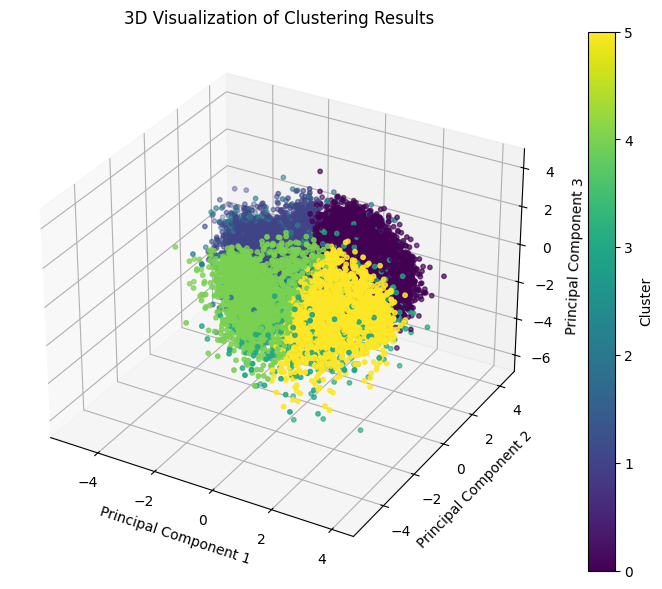

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce data to 7 principal components for visualization
pca_3d = PCA(n_components=7)
reduced_data = pca_3d.fit_transform(scaled_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Add clusters to the reduced data for visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three principal components colored by cluster
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
                      c=clusters, cmap='viridis', s=10)

# Label axes
ax.set_title("3D Visualization of Clustering Results")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.colorbar(scatter, label="Cluster")
plt.show()


In [10]:
# Create a DataFrame to represent the influence of each feature on the components
reduced_data_df = pd.DataFrame(reduced_data,
                          columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],
                          index=None)
reduced_data_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.182183,0.894594,1.899139,-0.173302,-5.225424,6.517732,2.948838
1,-0.253332,0.775583,2.119374,0.015780,-5.643493,5.430562,3.146130
2,0.630173,2.060971,0.325894,-1.514582,-5.632049,6.012696,3.397956
3,0.085495,-0.801197,3.110181,-0.377119,-5.103610,4.416578,2.376942
4,0.428624,1.968717,-0.410891,0.228757,-5.256499,4.474950,2.797180


In [12]:
# Retrieve the loading matrix (components_) for the first 6 principal components
loading_matrix = pca_3d.components_

# Create a DataFrame to represent the influence of each feature on the components
loading_df = pd.DataFrame(loading_matrix.T,
                          columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],
                          index=features.columns)

# Sort the features by their influence (absolute value) for each principal component
top_features_pc1 = loading_df['PC1'].abs().sort_values(ascending=False)
top_features_pc2 = loading_df['PC2'].abs().sort_values(ascending=False)
top_features_pc3 = loading_df['PC3'].abs().sort_values(ascending=False)
top_features_pc4 = loading_df['PC4'].abs().sort_values(ascending=False)
top_features_pc5 = loading_df['PC5'].abs().sort_values(ascending=False)
top_features_pc6 = loading_df['PC6'].abs().sort_values(ascending=False)
top_features_pc7 = loading_df['PC7'].abs().sort_values(ascending=False)

top_features_pc1.head(), top_features_pc2.head(), top_features_pc3.head(), top_features_pc4.head(), top_features_pc5.head(), top_features_pc6.head(), top_features_pc7.head()


(relationship      0.539320
 sex               0.472076
 hours.per.week    0.369721
 marital.status    0.335866
 age               0.314791
 Name: PC1, dtype: float64,
 education         0.611544
 education.num     0.608146
 sex               0.280068
 native.country    0.268677
 relationship      0.208468
 Name: PC2, dtype: float64,
 age               0.488311
 fnlwgt            0.457471
 marital.status    0.420420
 occupation        0.342019
 sex               0.315748
 Name: PC3, dtype: float64,
 race              0.610875
 native.country    0.566145
 age               0.274151
 capital.gain      0.244518
 marital.status    0.243470
 Name: PC4, dtype: float64,
 capital.gain    0.605687
 capital.loss    0.566648
 workclass       0.406683
 occupation      0.292843
 fnlwgt          0.150399
 Name: PC5, dtype: float64,
 occupation        0.729050
 capital.loss      0.441801
 fnlwgt            0.355825
 age               0.198943
 hours.per.week    0.178915
 Name: PC6, dtype: float64,
 w

In [13]:
import plotly.express as px

# Interactive 3D plot Clusters
fig = px.scatter_3d(reduced_data_df, x='PC1', y='PC2', z='PC3',
                    color=clusters, title='Interactive 3D Scatter Plot of Clusters')
fig.show()